In [27]:
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt
from sage_data_client import query
import numpy as np

In [28]:
def get_measurements(vsn, name):
    return query(
    start="-3h",
    filter={
        "name": name,
        "vsn": vsn.upper(),
        }
    )

In [29]:
w023 = get_measurements("w023", name="env.raingauge.total_acc")


<AxesSubplot: xlabel='timestamp'>

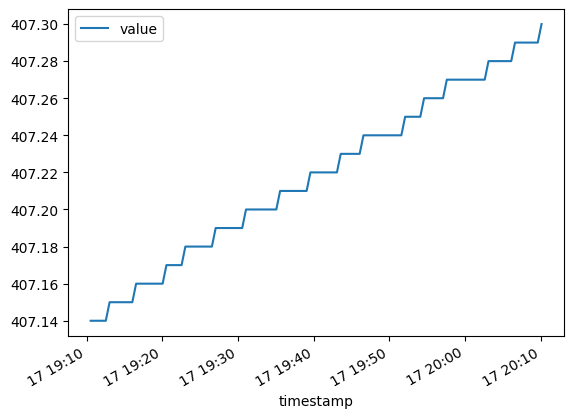

In [6]:
w023.plot(x="timestamp", y="value")

In [9]:
w023

,timestamp,name,value,meta.host,meta.job,meta.node,meta.plugin,meta.task,meta.vsn
0,2022-11-17 19:10:32.434088474+00:00,env.raingauge.total_acc,407.14,0000dca632a3058b.ws-rpi,sage,000048b02d15bc7c,waggle/plugin-raingauge:0.4.1,raingauge,W023
1,2022-11-17 19:11:02.459970444+00:00,env.raingauge.total_acc,407.14,0000dca632a3058b.ws-rpi,sage,000048b02d15bc7c,waggle/plugin-raingauge:0.4.1,raingauge,W023
2,2022-11-17 19:11:32.470569598+00:00,env.raingauge.total_acc,407.14,0000dca632a3058b.ws-rpi,sage,000048b02d15bc7c,waggle/plugin-raingauge:0.4.1,raingauge,W023
3,2022-11-17 19:12:02.511317489+00:00,env.raingauge.total_acc,407.14,0000dca632a3058b.ws-rpi,sage,000048b02d15bc7c,waggle/plugin-raingauge:0.4.1,raingauge,W023
4,2022-11-17 19:12:32.539173720+00:00,env.raingauge.total_acc,407.14,0000dca632a3058b.ws-rpi,sage,000048b02d15bc7c,waggle/plugin-raingauge:0.4.1,raingauge,W023
...,...,...,...,...,...,...,...,...,...
115,2022-11-17 20:08:05.401448298+00:00,env.raingauge.total_acc,407.29,0000dca632a3058b.ws-rpi,sage,000048b02d15bc7c,waggle/plugin-raingauge:0.4.1,raingauge,W023
116,2022-11-17 20:08:35.428635940+00:00,env.raingauge.total_acc,407.29,0000dca632a3058b.ws-rpi,sage,000048b02d15bc7c,waggle/plugin-raingauge:0.4.1,raingauge,W023
117,2022-11-17 20:09:05.455165950+00:00,env.raingauge.total_acc,407.29,0000dca632a3058b.ws-rpi,sage,000048b02d15bc7c,waggle/plugin-raingauge:0.4.1,raingauge,W023
118,2022-11-17 20:09:35.497548292+00:00,env.raingauge.total_acc,407.29,0000dca632a3058b.ws-rpi,sage,000048b02d15bc7c,waggle/plugin-raingauge:0.4.1,raingauge,W023


In [11]:
w023["value"].diff().mean()

0.0013445378151262606

In [30]:
w023.groupby(pd.Grouper(key="timestamp", freq="1H")).mean().diff()

/var/folders/tr/7n6yv5q54t73qs20cl85h5xm0000gn/T/ipykernel_37351/1413055547.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  w023.groupby(pd.Grouper(key="timestamp", freq="1H")).mean().diff()


,value
timestamp,
2022-11-17 17:00:00+00:00,NaN
2022-11-17 18:00:00+00:00,0.095468
2022-11-17 19:00:00+00:00,0.135116
2022-11-17 20:00:00+00:00,0.127171


In [49]:
w024["1st_derivative"] = w024["value"].diff() / w024["timestamp"].diff().dt.total_seconds()

In [43]:
any(w024["1st_derivative"].to_numpy() > 0.0003)

True

In [26]:
a = query(start="2022-09-10T00:00:00Z", end="2022-09-12T11:59:59Z", filter={"vsn": "W024", "name": "env.temperature", "sensor": "bme680"})

<AxesSubplot: xlabel='timestamp'>

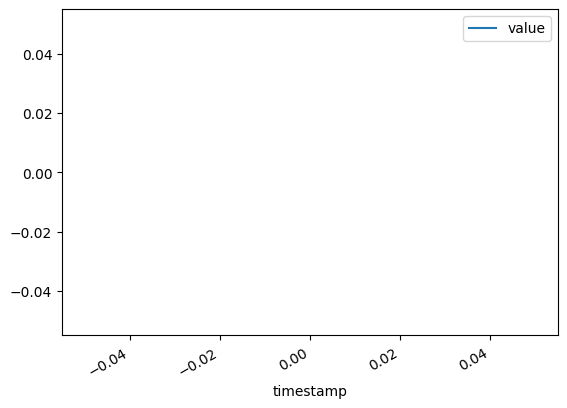

In [27]:
a.plot(x="timestamp", y="value")